In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the pre-built convolutional neural network

- InceptionNet: https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3
- Original paper: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Szegedy_Rethinking_the_Inception_CVPR_2016_paper.pdf
- Imagenet: http://www.image-net.org/

In [26]:
base_model = tf.keras.applications.InceptionV3(include_top = False, weights = "imagenet")
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_1410 (Conv2D)           (None, None, None,   864         ['input_16[0][0]']               
                                32)                                                               
                                                                                                  
 batch_normalization_1410 (Batc  (None, None, None,   96         ['conv2d_1410[0][0]']            
 hNormalization)                32)                                                    

In [27]:
len(base_model.layers)

311

In [28]:
# Relu
#names = ["mixed3","mixed5","mixed8","mixed9"]
names = ["mixed3","mixed5"]

In [29]:
base_model.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_16')>

In [30]:
layers = [base_model.get_layer(name).output for name in names]
layers

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

In [31]:
deep_dream_model = tf.keras.models.Model(inputs = base_model.input, outputs = layers)
deep_dream_model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_1410 (Conv2D)           (None, None, None,   864         ['input_16[0][0]']               
                                32)                                                               
                                                                                                  
 batch_normalization_1410 (Batc  (None, None, None,   96         ['conv2d_1410[0][0]']            
 hNormalization)                32)                                                        

In [32]:
len(deep_dream_model.layers)

165

# Loading And Pre-Processing The Images

In [33]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
path = "/content/drive/MyDrive/OpenCV/Images/StaryNight.jpg"

image = tf.keras.preprocessing.image.load_img(path, target_size = (225,375))

type(image), image.size , len(image.mode)

(PIL.Image.Image, (375, 225), 3)

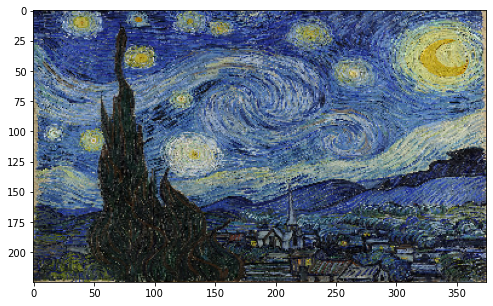

In [35]:
plt.figure(figsize = (15,5))
plt.imshow(image)
plt.show()

In [36]:
list(image.getdata())

[(6, 10, 11),
 (29, 33, 68),
 (35, 46, 66),
 (38, 46, 65),
 (46, 49, 68),
 (23, 29, 29),
 (13, 16, 31),
 (57, 62, 84),
 (85, 87, 99),
 (147, 146, 142),
 (141, 136, 130),
 (108, 118, 117),
 (16, 22, 58),
 (19, 29, 64),
 (82, 97, 120),
 (79, 94, 125),
 (147, 150, 169),
 (28, 31, 76),
 (57, 62, 104),
 (13, 20, 39),
 (37, 38, 68),
 (21, 30, 61),
 (4, 11, 53),
 (25, 32, 74),
 (48, 50, 99),
 (134, 132, 182),
 (127, 131, 156),
 (126, 133, 159),
 (138, 151, 170),
 (64, 76, 124),
 (67, 82, 123),
 (60, 75, 114),
 (75, 90, 133),
 (84, 119, 141),
 (52, 83, 78),
 (137, 156, 128),
 (51, 66, 71),
 (149, 170, 199),
 (153, 176, 220),
 (53, 81, 128),
 (90, 117, 170),
 (68, 94, 127),
 (161, 175, 175),
 (142, 155, 190),
 (92, 118, 133),
 (50, 72, 129),
 (107, 133, 158),
 (99, 122, 153),
 (27, 36, 67),
 (34, 45, 77),
 (95, 116, 133),
 (21, 41, 66),
 (52, 59, 103),
 (50, 55, 110),
 (34, 39, 69),
 (22, 24, 49),
 (3, 2, 33),
 (4, 7, 26),
 (28, 37, 36),
 (19, 27, 30),
 (19, 24, 44),
 (43, 48, 78),
 (93, 104, 1

In [37]:
image = tf.keras.preprocessing.image.img_to_array(image)
type(image),image.shape

(numpy.ndarray, (225, 375, 3))

In [38]:
image.max(),image.min()

(255.0, 0.0)

In [39]:
image = tf.keras.applications.inception_v3.preprocess_input(image)
image.max(),image.min(),image.shape

(1.0, -1.0, (225, 375, 3))

# Getting The Activations

In [40]:
image_batch = tf.expand_dims(image ,axis = 0)
image_batch.shape

TensorShape([1, 225, 375, 3])

In [41]:
# Brief

path = "/content/drive/MyDrive/OpenCV/Images/StaryNight.jpg"
image = tf.keras.preprocessing.image.load_img(path, target_size = (225,375))
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.keras.applications.inception_v3.preprocess_input(image)
image_batch = tf.expand_dims(image, axis = 0)
image_batch.shape , image.shape

(TensorShape([1, 225, 375, 3]), (225, 375, 3))

In [42]:
activations = deep_dream_model.predict(image_batch)
len(activations)

2

In [43]:
deep_dream_model.outputs

[<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
 <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>]

In [44]:
# 1 --- > Batch Size
# 12 --- > Dimension of The Images
# 21 --- > Dimension of The Images
# 768 --- > çıktı zaten 768'lik

activations[0].shape,activations[1].shape

((1, 12, 21, 768), (1, 12, 21, 768))

In [45]:
from google.colab.patches import cv2_imshow
import cv2

cv2_imshow(activations[0][0])

# Calculating The Loss

In [46]:
def calculate_loss(image, network):
    image_batch = tf.expand_dims(image, axis = 0)
    activations = network(image_batch)

    losses = []
    for act in activations:
        loss = tf.math.reduce_mean(act)
        losses.append(loss)

    return tf.reduce_sum(losses)

In [47]:
calculate_loss(image,deep_dream_model)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6168046>

In [48]:
activations[0].mean() + activations[1].mean()

0.6168046

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


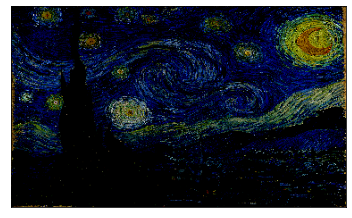

In [49]:
plt.imshow(image)
plt.xticks(())
plt.yticks(())
plt.show()

In [50]:
loss = calculate_loss(image, deep_dream_model)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.6168046>

# Gradient Ascent

In [51]:
# Compare the activations with the pixels
# Emphasize parts of the image
# Change the pixels of the input image

@tf.function
def deep_dream(network,image, learning_rate):

    with tf.GradientTape() as tape:
        tape.watch(image)
        loss = calculate_loss(image,network)

    gradients = tape.gradient(loss, image)
    gradients /= tf.math.reduce_std(gradients) # gradients = gradients /  tf.math.reduce_std(gradients)
    image = image + gradients*learning_rate
    image= tf.clip_by_value(image , -1,1)

    return loss, image

In [52]:
test_loss , test_image = deep_dream(deep_dream_model,image, learning_rate = 0.1)

In [53]:
def inverse_transform(image):

    # Çünkü min değer -1 olduğu için artı 1 ve  max değer ise 1 ve +1 ile 2 olduğu için 2 bölüyoruz..
    image = 255*(image + 1) / 2.0

    return tf.cast(image, tf.uint8)

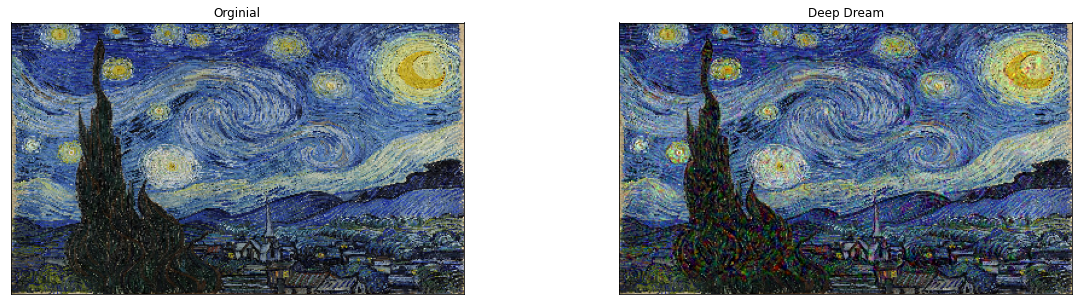

In [54]:
plt.figure(figsize = (20,5))

plt.subplot(121)
plt.imshow(inverse_transform(image))
plt.title("Orginial")
plt.xticks(())
plt.yticks(())


plt.subplot(122)
plt.imshow(inverse_transform(test_image))
plt.title("Deep Dream")
plt.xticks(())
plt.yticks(())

plt.show()

In [55]:
def run_deep_dream(network,image,epochs,learning_rate):

    for epoch in range(epochs):
        loss,image = deep_dream(network,image,learning_rate)

        if epoch % 200 == 0 :
            plt.figure(figsize = (12,12))
            plt.imshow(inverse_transform(image))
            plt.title("Epoch : {}, Loss : {}".format(epoch, loss),fontsize = 15)
            plt.show()

# Generating Images

In [56]:
image.max(),image.min(),image.shape,type(image)

(1.0, -1.0, (225, 375, 3), numpy.ndarray)

In [57]:
image = tf.keras.preprocessing.image.load_img("/content/drive/MyDrive/OpenCV/Images/StaryNight.jpg",target_size = (225,375))
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.keras.applications.inception_v3.preprocess_input(image)
image.max(),image.min(),image.shape,type(image)

(1.0, -1.0, (225, 375, 3), numpy.ndarray)

In [ ]:
run_deep_dream(network = deep_dream_model, image = image, epochs = 8000, learning_rate = 0.0001)

Output hidden; open in https://colab.research.google.com to view.

# HomeWork and Summary

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount("/content/drive")

Mounted at /content/drive


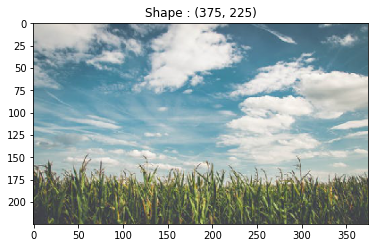

(225, 375, 3)

In [62]:
path = "/content/drive/MyDrive/OpenCV/Images/sky.jpeg"
image = tf.keras.preprocessing.image.load_img(path, target_size = (225,375))

plt.imshow(image)
plt.title(f"Shape : {image.size}")
plt.show()

image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.keras.applications.inception_v3.preprocess_input(image)
image.shape

In [63]:
base_model = tf.keras.applications.InceptionV3(include_top = False, weights ="imagenet")
names = ["mixed3","mixed5"]
layers = [base_model.get_layer(name).output for name in names]
deep_dream_model = tf.keras.models.Model(inputs = base_model.input, outputs = layers)

def calculate_loss(image, network):

    image_batch = tf.expand_dims(image,axis = 0)
    activations = network(image_batch)

    losses = []
    for act in activations:

        loss = tf.math.reduce_mean(act)
        losses.append(loss)

    return tf.reduce_sum(losses)

@tf.function
def deep_dream(network,image,learning_rate):

    with tf.GradientTape() as tape :
        tape.watch(image)
        loss = calculate_loss(image, network)

    gradients = tape.gradient(loss,image) # Derivate
    gradients /= tf.math.reduce_std(gradients)
    image = image + gradients*learning_rate
    image = tf.clip_by_value(image, -1, 1)

    return loss,image

def inverse_transform(image):

    image = 255*(image + 1.0) / 2.0

    return tf.cast(image,tf.uint8)

def run_deep_dream(network, image, epochs, learning_rate):

    for epoch in range(epochs+1):

        loss,image = deep_dream(network,image,learning_rate)
        
        if epoch % 200 == 0:

            plt.figure(figsize = (12,12))
            plt.imshow(inverse_transform(image))
            plt.title(f"Epoch : {epoch}, Loss : {loss}", fontsize = 15)
            plt.show()

In [64]:
run_deep_dream(network = deep_dream_model, image = image, epochs = 8000, learning_rate = 0.0001)

Output hidden; open in https://colab.research.google.com to view.